In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Los valores de theta calculados con regularización son: [ 5.28704624e-01  4.03319529e-04 -6.47032277e-05  7.51491317e-01
  4.43325638e-01  3.08733031e-01  1.73328496e-01]
Con un costo de: 1.356121425969314e-05


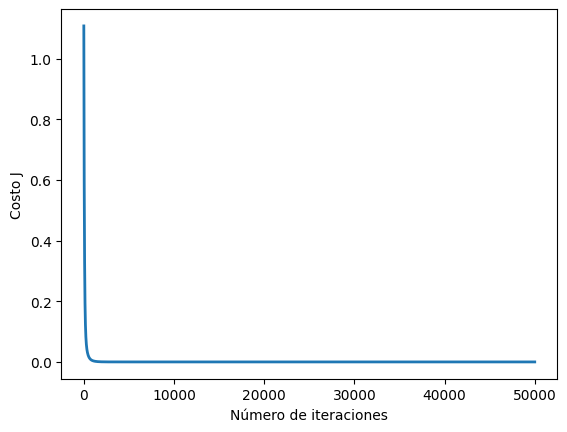

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  # Importar matplotlib.pyplot para trazar gráficos

# cargando data set de prediccion de videojuegos en el top y tambien el precio
data = np.loadtxt('/content/drive/MyDrive/laboratorio1/dataset_10.csv', delimiter=';')

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X, y = data[:, :6], data[:, 6]

# usando el 80% para entrenamiento y el 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#normalizo para que esten en la misma escala y pueda usarlos
def normalizarCaracteristicas(X_train, X_test):
    mu_train = np.mean(X_train, axis=0)
    sigma_train = np.std(X_train, axis=0)

    X_train_norm = (X_train - mu_train) / sigma_train
    X_test_norm = (X_test - mu_train) / sigma_train

    return X_train_norm, mu_train, sigma_train, X_test_norm

# aplico mi funcion de normaliacion
X_train_norm, mu_train, sigma_train, X_test_norm = normalizarCaracteristicas(X_train, X_test)

# Añado la columna para el sesgo y mi modelo de entrenamiento
X_train_norm = np.hstack((np.ones((X_train_norm.shape[0], 1)), X_train_norm))
X_test_norm = np.hstack((np.ones((X_test_norm.shape[0], 1)), X_test_norm))


#calculo el costo del modelo
def calcularCostoRegularizado(X, y, theta, lambda_):
    m = y.size
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * (np.sum(np.square(h - y)) + lambda_ * np.sum(np.square(theta[1:])))
    return J
#Como siempre utilizo el desenso de la gradiente para encontrar para encontrar parametros optimos del modelo
def calcularDescensoGradienteRegularizado(X, y, theta, alpha, lambda_, numero_iteraciones):
    m = y.shape[0]
    theta = theta.copy()
    J_historico = []

    for i in range(numero_iteraciones):
        # Actualización de los parámetros theta con regularización
        theta -= (alpha / m) * (X.T.dot(X.dot(theta) - y) + lambda_ * np.concatenate(([0], theta[1:])))
        J_actual = calcularCostoRegularizado(X, y, theta, lambda_)
        J_historico.append(J_actual)

    return theta, J_historico

# utilizare parametros buscando evitar el sobreajuste para mis costo probando valores en lambda

lambda_ = 0.0001 # Parámetro de regularización

# degino theta num-ite alpha
theta = np.zeros(7)
num_ite = 50000
alpha = 0.003

#llamo a calcular desenso de gradiente
theta, J_historico = calcularDescensoGradienteRegularizado(X_train_norm, y_train, theta, alpha, lambda_, num_ite)
print(f"Los valores de theta calculados con regularización son: {theta}")
print(f"Con un costo de: {J_historico[-1]}")

plt.plot(np.arange(len(J_historico)), J_historico, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.show()


Los valores de theta calculados son: [ 5.28704624e-01  4.03322174e-04 -6.47028299e-05  7.51491325e-01
  4.43325639e-01  3.08733030e-01  1.73328494e-01]
Con un costo de: 1.355787551949967e-05


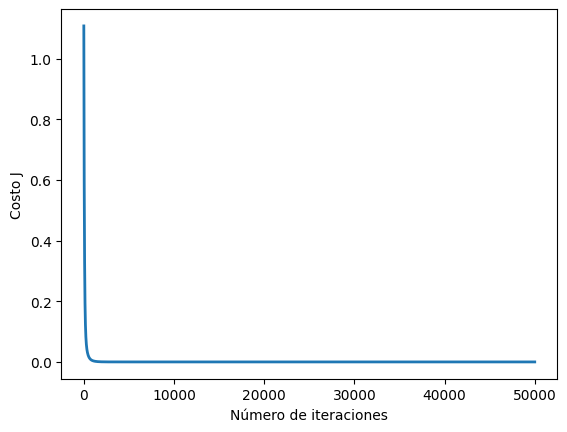

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Paso 1: Cargar el conjunto de datos
data = np.loadtxt('/content/drive/MyDrive/laboratorio1/dataset_10.csv', delimiter=';')

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X, y = data[:, :6], data[:, 6]

# Paso 3: Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def normalizarCaracteristicas(X_train, X_test):
    mu_train = np.mean(X_train, axis=0)
    sigma_train = np.std(X_train, axis=0)

    X_train_norm = (X_train - mu_train) / sigma_train
    X_test_norm = (X_test - mu_train) / sigma_train

    return X_train_norm, mu_train, sigma_train, X_test_norm

# Normalizar características
X_train_norm, mu_train, sigma_train, X_test_norm = normalizarCaracteristicas(X_train, X_test)

# Añadir columna de unos para el término de sesgo (intercept)
X_train_norm = np.hstack((np.ones((X_train_norm.shape[0], 1)), X_train_norm))
X_test_norm = np.hstack((np.ones((X_test_norm.shape[0], 1)), X_test_norm))

def calcularCosto(X, y, theta):
    m = y.size
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
    m = y.shape[0]
    theta = theta.copy()
    J_historico = []

    for i in range(numero_iteraciones):
        theta = theta - (alpha / m) * (X.T.dot(X.dot(theta) - y))
        J_actual = calcularCosto(X, y, theta)
        J_historico.append(J_actual)

    return theta, J_historico

theta = np.zeros(7)
num_ite = 50000
alpha = 0.003

theta, J_historico = calcularDescensoGradiente(X_train_norm, y_train, theta, alpha, num_ite)
print(f"Los valores de theta calculados son: {theta}")
print(f"Con un costo de: {J_historico[-1]}")

plt.plot(np.arange(len(J_historico)), J_historico, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.show()



En resumen, aunque el costo con regularización es ligeramente más alto que el costo sin regularización en los datos de entrenamiento, esto puede ser una indicación de que el modelo regularizado generaliza mejor a datos nuevos y no vistos.
 Por lo tanto, en términos de capacidad de generalización y rendimiento predictivo en situaciones del mundo real, es probable que el modelo con regularización sea preferible.

 mejores hiperparametros encontrados para regularizacion
lambda_ = 0.0001 # Parámetro de regularización
num_ite = 50000
alpha = 0.003

  Es importante validar el rendimiento de ambos modelos en un conjunto de datos de prueba independiente para confirmar esta evaluación.

En este escenario, consideraría que el modelo sin regularización es ligeramente mejor, ya que tiene un costo ligeramente menor y no requiere la introducción del término de regularización en la función de costo.
mejores hiperparametros encontrados sin regularizacion
num_ite = 50000
alpha = 0.003